<a href="https://colab.research.google.com/github/MarianelaGarcia/Laboratorio/blob/master/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [55]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
suma_precios1=tienda['Precio'].sum()
suma_precios2=tienda2['Precio'].sum()
suma_precios3=tienda3['Precio'].sum()
suma_precios4=tienda4['Precio'].sum()
print (f"La suma de la tienda 1 es: {suma_precios1}")
print (f"La suma de la tienda 2 es: {suma_precios2}")
print (f"La suma de la tienda 3 es: {suma_precios3}")
print (f"La suma de la tienda 4 es: {suma_precios4}")



La suma de la tienda 1 es: 1150880400.0
La suma de la tienda 2 es: 1116343500.0
La suma de la tienda 3 es: 1098019600.0
La suma de la tienda 4 es: 1038375700.0


# 2. Ventas por categoría

In [ ]:
tablas=[tienda,tienda2,tienda3,tienda4]

for i, tabla in enumerate(tablas, start=1):
    print(f"Resultados para Tabla {i}:")
    resultado = tabla.groupby('Categoría del Producto').size().reset_index(name='cantidad_vendida')
    print(resultado)
    print()



Resultados para Tabla 1:
    Categoría del Producto  cantidad_vendida
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Resultados para Tabla 2:
    Categoría del Producto  cantidad_vendida
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Resultados para Tabla 3:
    Categoría del Producto  cantidad_vendida
0  Artículos para el hogar               177
1     Deportes y divers

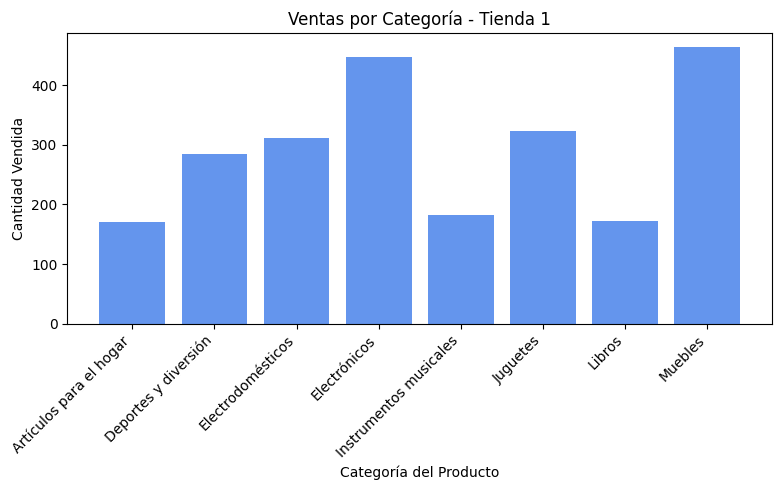

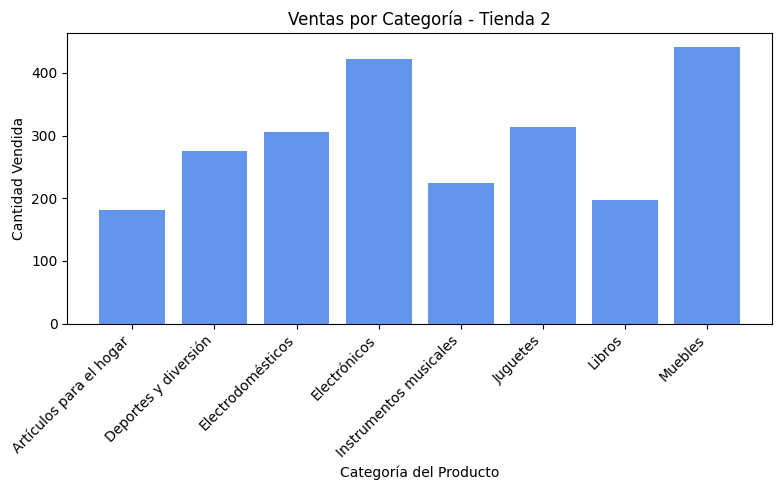

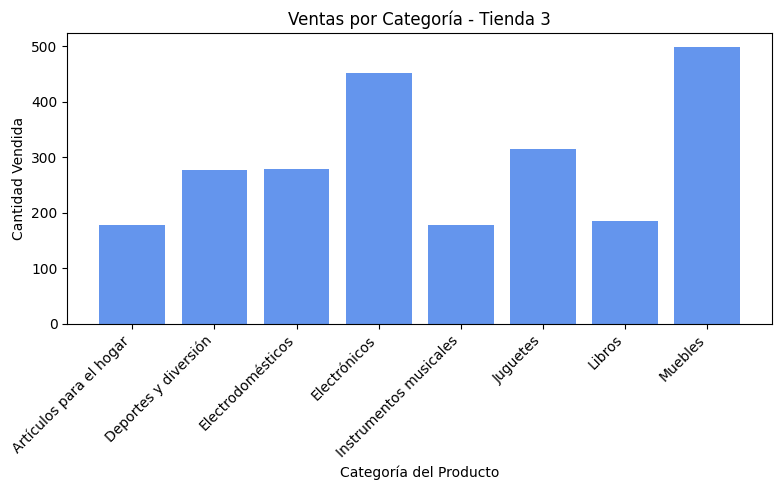

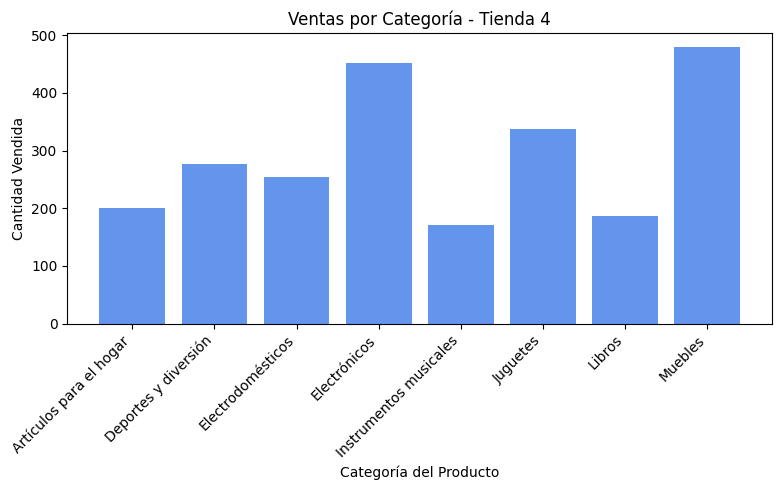

In [57]:
import matplotlib.pyplot as plt

tablas = [tienda, tienda2, tienda3, tienda4]

for i, tabla in enumerate(tablas, start=1):
    resultado = tabla.groupby('Categoría del Producto').size().reset_index(name='cantidad_vendida')

    plt.figure(figsize=(8,5))
    plt.bar(resultado['Categoría del Producto'], resultado['cantidad_vendida'], color='cornflowerblue')
    plt.title(f'Ventas por Categoría - Tienda {i}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
for i, tabla in enumerate(tablas, start=1):
    print(f"Resultados para Tabla {i}:")
    resultado = tabla.groupby('Calificación').size().reset_index(name='calificacion_venta')
    print(resultado)
    print()


Resultados para Tabla 1:
   Calificación  calificacion_venta
0             1                 319
1             2                  86
2             3                 218
3             4                 444
4             5                1292

Resultados para Tabla 2:
   Calificación  calificacion_venta
0             1                 273
1             2                  93
2             3                 209
3             4                 482
4             5                1302

Resultados para Tabla 3:
   Calificación  calificacion_venta
0             1                 297
1             2                  79
2             3                 193
3             4                 434
4             5                1356

Resultados para Tabla 4:
   Calificación  calificacion_venta
0             1                 310
1             2                  85
2             3                 210
3             4                 453
4             5                1300



# 4. Productos más y menos vendidos

In [40]:


todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

todas_las_tiendas.columns = todas_las_tiendas.columns.str.lower().str.strip().str.replace(" ", "_")

ventas_por_producto = todas_las_tiendas.groupby('producto').size().reset_index(name='cantidad_vendida')

ventas_ordenadas = ventas_por_producto.sort_values(by='cantidad_vendida', ascending=False)

producto_mas_vendido = ventas_ordenadas.iloc[0]
producto_menos_vendido = ventas_ordenadas.iloc[-1]

print("🏆 Producto más vendido:")
print(f"{producto_mas_vendido['producto']} - {producto_mas_vendido['cantidad_vendida']} unidades")

print("\n📉 Producto menos vendido:")
print(f"{producto_menos_vendido['producto']} - {producto_menos_vendido['cantidad_vendida']} unidades")



🏆 Producto más vendido:
Mesa de noche - 210 unidades

📉 Producto menos vendido:
Celular ABXY - 157 unidades


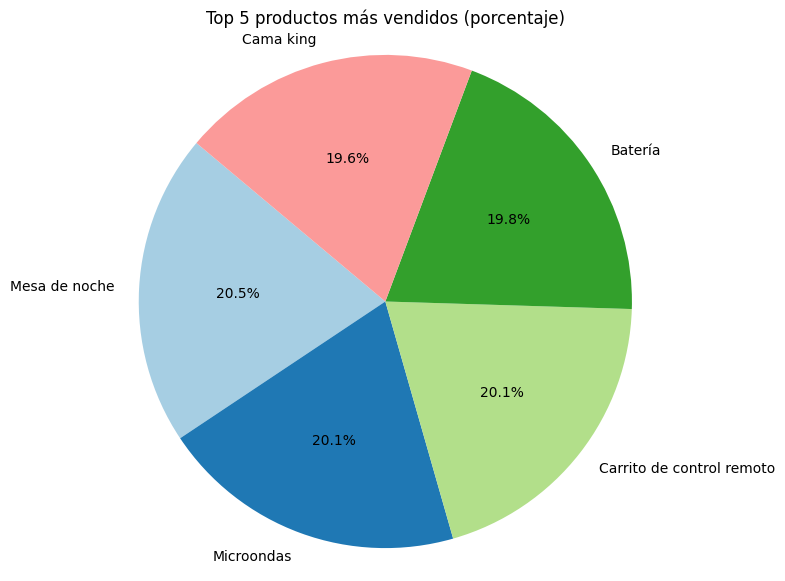

In [52]:
import matplotlib.pyplot as plt

# Combinar las 4 tiendas en un solo DataFrame
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Normalizar columnas
todas_las_tiendas.columns = todas_las_tiendas.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("ñ", "n")

# Contar ventas por producto
ventas_por_producto = todas_las_tiendas.groupby('producto').size().reset_index(name='cantidad_vendida')

# Seleccionar top 5 productos más vendidos
top5 = ventas_por_producto.sort_values(by='cantidad_vendida', ascending=False).head(5)

# Crear gráfico de pastel
plt.figure(figsize=(7,7))
plt.pie(top5['cantidad_vendida'], labels=top5['producto'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 productos más vendidos (porcentaje)')
plt.axis('equal')  # Para que el pie sea un círculo
plt.show()


# 5. Envío promedio por tienda

In [47]:
# Promedio de costo de envío sin cambiar nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

print("💸 Promedio de costo de envío por tienda:")
for df, nombre in zip(tiendas, nombres):
    if 'Costo de envío' in df.columns:
        promedio = df['Costo de envío'].mean()
        print(f"{nombre}: ${promedio:.2f}")
    else:
        print(f"⚠️ {nombre} no tiene la columna 'Costo de envío'.")


💸 Promedio de costo de envío por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


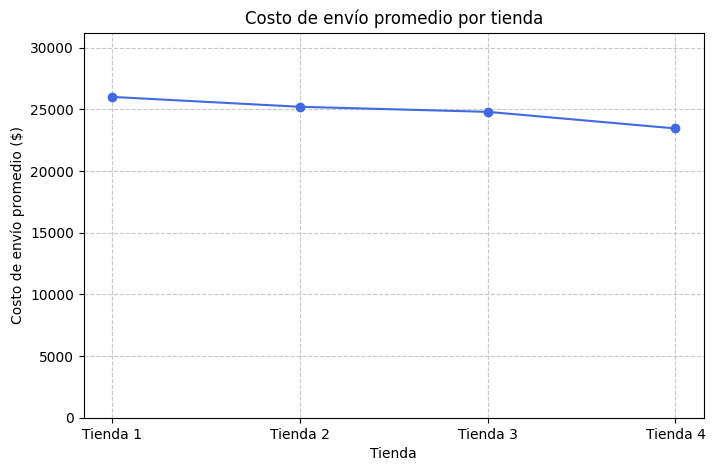

In [58]:
import matplotlib.pyplot as plt

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

promedios_envio = []
for df in tiendas:
    if 'Costo de envío' in df.columns:
        promedio = df['Costo de envío'].mean()
        promedios_envio.append(promedio)
    else:
        promedios_envio.append(0)  # O np.nan si prefieres

plt.figure(figsize=(8,5))
plt.plot(nombres, promedios_envio, marker='o', linestyle='-', color='royalblue')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio ($)')
plt.ylim(0, max(promedios_envio)*1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# **Informe de Recomendación para la Venta de una Tienda**
# Introducción
El propósito de este informe es brindar a Sr. Juan un análisis detallado y fundamentado para decidir cuál de sus cuatro tiendas debe venderse. Para ello, se evaluaron diferentes aspectos clave del desempeño de cada tienda: ingresos totales, ventas por categorías, productos más y menos vendidos, calificación promedio de los clientes y costo promedio de envío. Además, se apoyó el análisis con gráficos que facilitan la visualización comparativa.

Desarrollo
Ingresos Totales por Tienda
Los ingresos totales reflejan la capacidad comercial y el aporte económico de cada tienda al negocio general:

Tienda 1: 1,150,880,400

Tienda 2: 1,116,343,500

Tienda 3: 1,098,019,600

Tienda 4: 1,038,375,700

La Tienda 1 lidera en ingresos, seguida por las Tiendas 2 y 3, con diferencias significativas respecto a la Tienda 4, que presenta la facturación más baja.

Ventas por Categoría y Productos Destacados
El análisis de ventas por categoría muestra que la Tienda 4 es competitiva en segmentos específicos como Artículos para el hogar y Juguetes, pero tiene menores ventas en categorías clave como Electrodomésticos y Muebles, donde Tiendas 1 y 3 sobresalen.

Respecto a productos específicos:

Más vendido: Mesa de noche (210 unidades), producto con alta rotación y demanda.

Menos vendido: Celular ABXY (157 unidades), producto que puede estar generando costos por baja rotación.

Calificaciones Promedio de Clientes
Las calificaciones oscilan entre 3.38 y 3.40 en una escala de 0 a 4, con poca diferencia entre tiendas. Esto indica una satisfacción homogénea entre clientes, lo cual no representa un factor diferenciador para la toma de decisión.

Costo Promedio de Envío
El costo de envío promedio por tienda es:

Tienda 1: $26,018.61

Tienda 2: $25,216.24

Tienda 3: $24,805.68

Tienda 4: $23,459.46

La Tienda 4 presenta el costo de envío más bajo, lo que puede traducirse en una ventaja operacional y ahorro en gastos logísticos. Sin embargo, esta ventaja no compensa su bajo desempeño general en ingresos y ventas.

Conclusión y Recomendación
Después de analizar todos los factores relevantes, se concluye que la Tienda 4 es la candidata más adecuada para ser vendida por las siguientes razones:

Tiene la facturación más baja de las cuatro tiendas, aportando significativamente menos ingresos totales.

A pesar de su eficiencia en costos de envío y liderazgo en ciertas categorías, su bajo volumen general de ventas limita su rentabilidad y crecimiento.

La calificación del cliente es buena, pero similar a la de las otras tiendas, por lo que no compensa los otros factores negativos.

El resto de tiendas (en especial Tienda 1 y 3) mantienen un mejor equilibrio entre ingresos, ventas diversificadas y costos.

Por lo tanto, vender la Tienda 4 permitirá optimizar recursos, concentrar esfuerzos en tiendas más rentables y fortalecer la posición competitiva de su negocio en general.

# 📊 Análisis Comparativo de Tiendas - Proyecto de Decisión Empresarial

Este proyecto tiene como objetivo principal analizar el desempeño de **cuatro tiendas** utilizando Python y bibliotecas como **Pandas** y **Matplotlib**, con el fin de **recomendar cuál tienda debe cerrarse** para mejorar la eficiencia del negocio.

---

## 📌 Objetivo

Ayudar al Sr. Juan, propietario de varias tiendas, a tomar una decisión fundamentada sobre **cuál tienda vender o cerrar** con base en análisis cuantitativos y visualizaciones gráficas.

---

## 📁 Contenido del Proyecto

- **Cargas de datos** de las tiendas (`tienda`, `tienda2`, `tienda3`, `tienda4`)
- **Análisis de facturación total**
- **Ventas por categoría**
- **Productos más y menos vendidos**
- **Calificaciones de clientes**
- **Costos promedio de envío**
- **Visualizaciones gráficas**: barras, líneas y pie charts
- **Informe final estructurado y justificado**
- **Recomendación de negocio basada en datos**

---

## 📈 Principales Métricas Analizadas

| Métrica                     | Evaluada por Tienda |
|----------------------------|---------------------|
| Facturación Total           | ✅                  |
| Ventas por Categoría        | ✅                  |
| Producto Más y Menos Vendido| ✅                  |
| Calificación Promedio       | ✅                  |
| Costo de Envío Promedio     | ✅                  |

---

## 📊 Visualizaciones Generadas

- Gráfico de barras: Promedio de costo de envío por tienda
- Gráfico de líneas: Comparación de costos de envío
- Gráfico de pastel: Distribución de ventas por categoría
- Gráfico de columnas: Ventas por categoría para cada tienda

---

## ✅ Conclusión del Proyecto

Tras el análisis completo, se recomienda al **Sr. Juan cerrar la Tienda 4**, debido a:

- La **menor facturación total** entre las cuatro tiendas.
- Ventas inferiores en categorías clave como *Muebles* y *Electrodomésticos*.
- Calificaciones de clientes similares a otras tiendas (no diferenciador).
- Aunque tiene el **costo de envío más bajo**, no compensa su bajo rendimiento económico general.

---

## 🛠️ Tecnologías Usadas

- Python 3.x  
- Pandas  
- Matplotlib  
- Google Colab (para entorno de desarrollo y ejecución)

---

